### Generates Error strips figures

In [4]:
%load_ext autoreload
%autoreload 

In [5]:
import h5py
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import math 
import sys

In [9]:
diffmap_17 = ["#FF0000", "#F81318", "#F12731", "#EB3B4A", "#EB5C66", "#EB7D82", 
              "#EB9E9E", "#F1BEBE", "#F8DEDE", "#FFFFFF", "#DDDCFD", "#BCB9FB", 
              "#9B96FA", "#6A6CFA", "#3A43FA", "#1D21FC", "#0000FF", "#0000ce"]

diffJM = ["#FF0000", "#F81318", "#F12731", "#EB3B4A", "#EB5C66", "#EB7D82", 
              "#EB9E9E", "#F1BEBE", "#FFFFFF", "#FFFFFF", "#FFFFFF", "#BCB9FB", 
              "#9B96FA", "#6A6CFA", "#3A43FA", "#1D21FC", "#0000FF", "#0000ce"]

diffmap_17_colormap = matplotlib.colors.ListedColormap(diffJM)

file_name = 'e:/data_turbines/states.csv'

sites = pd.read_csv(file_name)
sites.columns

Index(['site', 'Lat', 'Lon', 'state', 'Lat_trunc', 'Lon_trunc', 'numero_site',
       'MLP', 'CNN_sep', 'RF_MIMO', 'Persistence', 'Mean', 'Var', 'CNN',
       'diff', 'diff RF-CNN'],
      dtype='object')

In [13]:
def plot_accuracy(site, arch, mode_arch, acc=None, period = '12', save=False):
   accuracy_site = 0
   if period == '01':
        p = '144'
   else:
        p = '12'
   s = math.trunc(int(site) / 500)  
   site = str(s)+'-'+site+'-'+period
   print(site,arch,site)

   f = h5py.File('e:/data_turbines/errors'+mode_arch+'-S'+site+'-1-'+p+'-R0.hdf5', 'r+')
   val_y = f['/errors/val_yu']
   val_yp = f['/errors/val_ypu']
   print(val_y.shape)
   err = val_y[()] - val_yp[()]

   nvals = val_y.shape[0] # ojo 8755 o 8752 para persistencia
   prop = 100
   pixels = np.zeros((12*prop, nvals))
   ers    = np.zeros((12,nvals))
   print('nvals',nvals)
   for i in range(12):
      for j in range(prop):
         pixels[(i*prop) + j,:] = err[:nvals,i]
      ers[i,:] = err[:nvals,i]
   pixels[0,0] = -np.max(pixels)

   fig = plt.figure(figsize=(20,10))
   ax = plt.axes()

   def y_yhat(n):
      return(n/100)
   def yhat_y(n):
      return(n*100)


   def x_xhat(n):
      return(n/(24))
   def xhat_x(n):
      return(n*(24))

   parsed_site = site.split('-')
   a = sites.loc[sites['numero_site'] == int(parsed_site[1])]
   c=a.reset_index(drop=True)
   Lat = c.iloc[[0]].Lat_trunc.values[0]
   Lon = c.iloc[[0]].Lon_trunc.values[0]
   Sta = c.iloc[[0]].state.values[0]
   if Sta == 'ER':
      Sta = "Off-shore"
   mean_site = c.iloc[[0]].Mean.values[0]
   var_site  = c.iloc[[0]].Var.values[0]
   print('acc', acc)
   if acc != None:
    accuracy_site = acc
   else:
      if arch == 'MLP':
          accuracy_site = c.iloc[[0]].MLP.values[0]
      if arch == 'CNN-sep-2L':
          accuracy_site = c.iloc[[0]].CNN_sep.values[0]
      if arch == 'RF_MIMO':
          print(',,,')
          accuracy_site = c.iloc[[0]].RF_MIMO.values[0]
      if arch == 'Persistence':
       accuracy_site = c.iloc[[0]].Persistence.values[0]
      if arch == 'CNN-2L':
       accuracy_site = c.iloc[[0]].CNN.values[0]
   print('---',arch)
   print('Accuracy_site', accuracy_site)   
   
   Name = ' [' + str(Lat)+', '+ str(Lon) +'] '+ str(Sta)

#ax.set_ylabel('prediction (12 steps)')
   ax.yaxis.set_ticklabels([])
   ax.set_xlabel('steps')
   secay = ax.secondary_yaxis('left',functions=(y_yhat, yhat_y))
   secay.set_ylabel('Pred 12 steps ahead')

   secax = ax.secondary_xaxis('top',functions=(x_xhat, xhat_x))
   secax.set_xlabel('day')
#   im = ax.imshow(pixels,cmap=diffmap_17_colormap)
   im = ax.imshow(pixels, cmap = "seismic")
   im.set_clim(vmin=-15, vmax=15)
   plt.colorbar(im, fraction=0.006, pad=0.04,label="Error")
   parsed_site = site.split('-')
   plt.title('Accuracy graph site ' + parsed_site[1]+ Name + ' / architecture: ' + arch + 
             "- $(R^2$:{0:.3f})".format(accuracy_site)+' Mean {0:.2f}m/s / '.format(mean_site)+
             'Var {0:.2f}'.format(var_site))
   if save == True:
      print("file name",parsed_site[1]+'_accuracy_'+arch+'.pdf')
      plt.savefig(parsed_site[1]+'_accuracy_'+arch+'.pdf', format='pdf')
   plt.show()
   return

62-31321-12 CNN-sep-2L 62-31321-12
--- CNN-sep-2L
Accuracy_site 9.614645676
file name 31321_accuracy_CNN-sep-2L.pdf


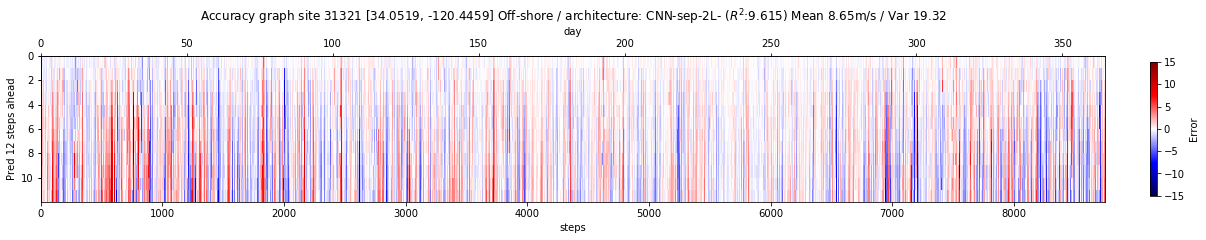

203-101620-12 CNN-sep-2L 203-101620-12
--- CNN-sep-2L
Accuracy_site 9.672521693
file name 101620_accuracy_CNN-sep-2L.pdf


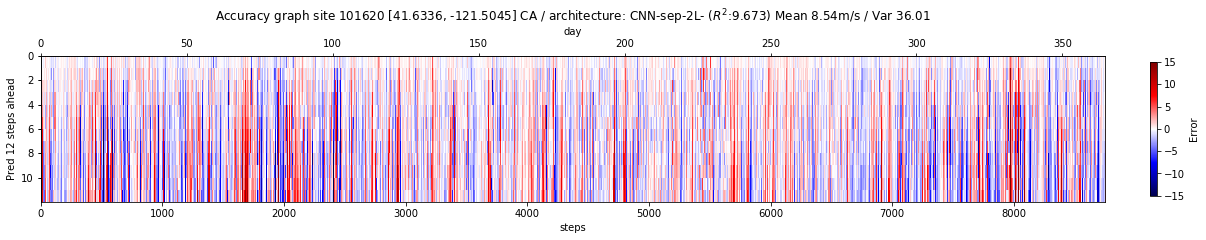

218-109115-12 CNN-sep-2L 218-109115-12
--- CNN-sep-2L
Accuracy_site 9.52802035
file name 109115_accuracy_CNN-sep-2L.pdf


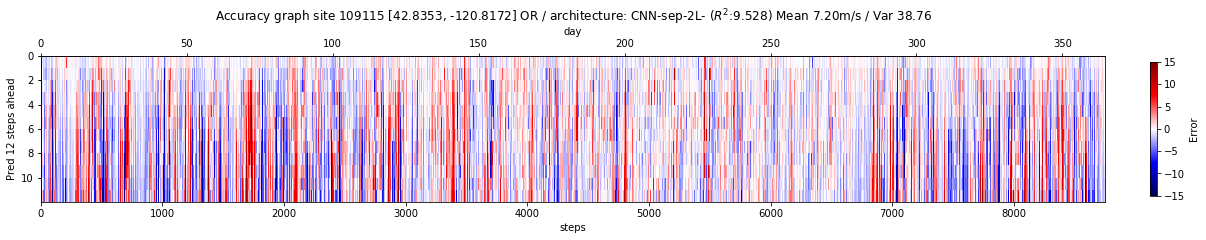

47-23633-12 CNN-sep-2L 47-23633-12
--- CNN-sep-2L
Accuracy_site 9.479840925
file name 23633_accuracy_CNN-sep-2L.pdf


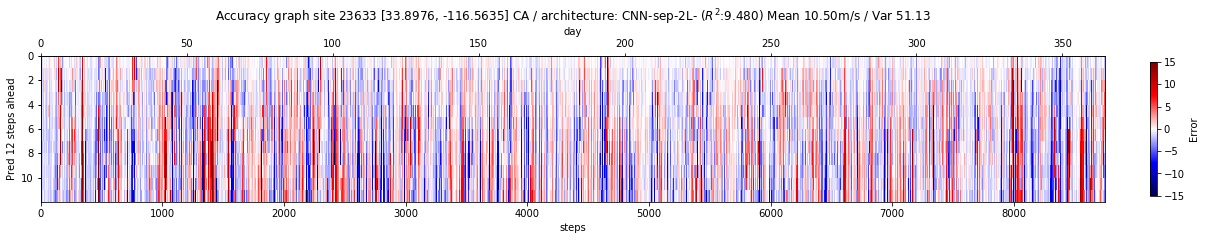

112-56348-12 CNN-sep-2L 112-56348-12
--- CNN-sep-2L
Accuracy_site 9.232627783
file name 56348_accuracy_CNN-sep-2L.pdf


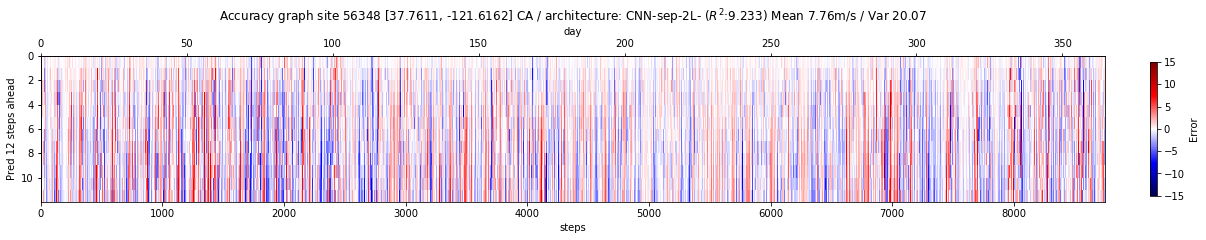

2-1434-12 CNN-sep-2L 2-1434-12
--- CNN-sep-2L
Accuracy_site 9.135425255
file name 1434_accuracy_CNN-sep-2L.pdf


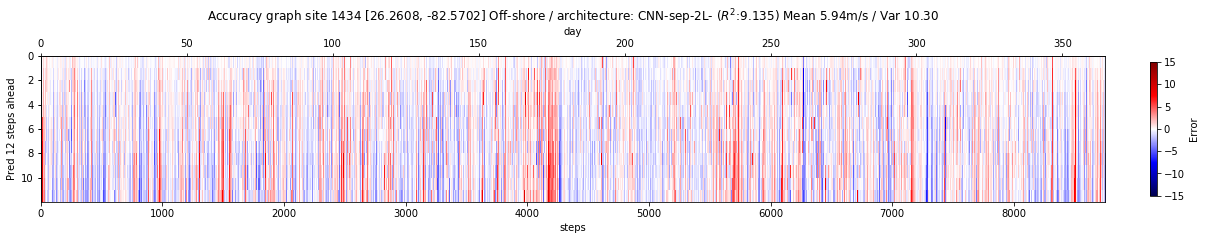

202-101242-12 CNN-sep-2L 202-101242-12
--- CNN-sep-2L
Accuracy_site 4.831301749
file name 101242_accuracy_CNN-sep-2L.pdf


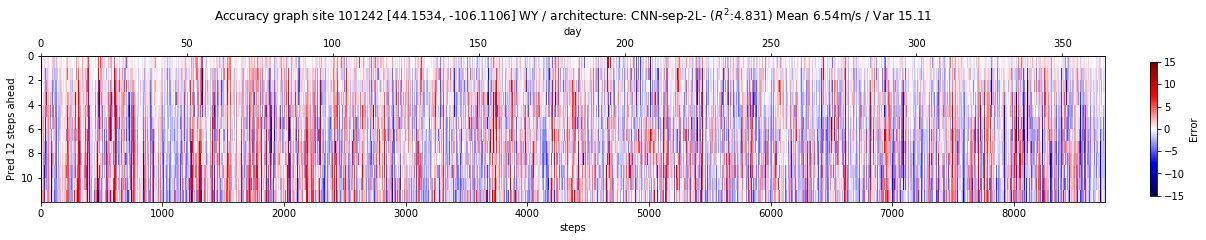

102-51361-12 CNN-sep-2L 102-51361-12
--- CNN-sep-2L
Accuracy_site 4.164570178
file name 51361_accuracy_CNN-sep-2L.pdf


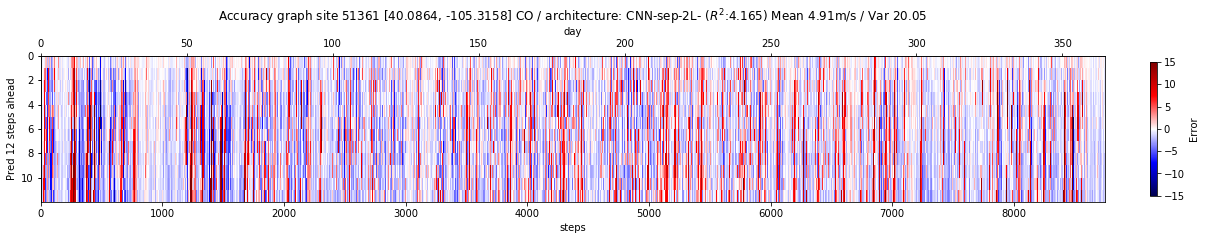

72-36471-12 CNN-sep-2L 72-36471-12
--- CNN-sep-2L
Accuracy_site 4.055404127
file name 36471_accuracy_CNN-sep-2L.pdf


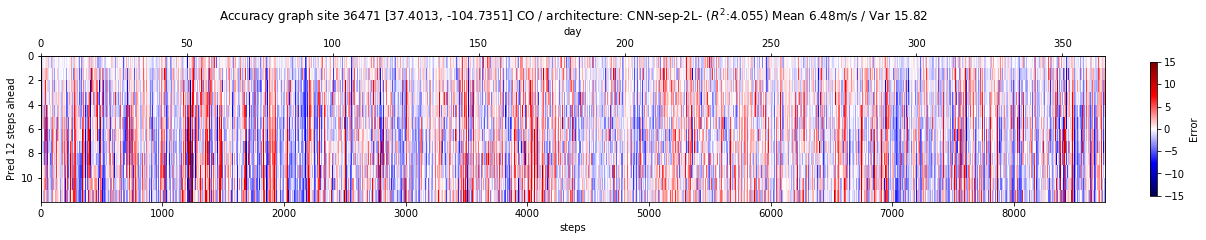

100-50464-12 CNN-sep-2L 100-50464-12
--- CNN-sep-2L
Accuracy_site 4.680057777
file name 50464_accuracy_CNN-sep-2L.pdf


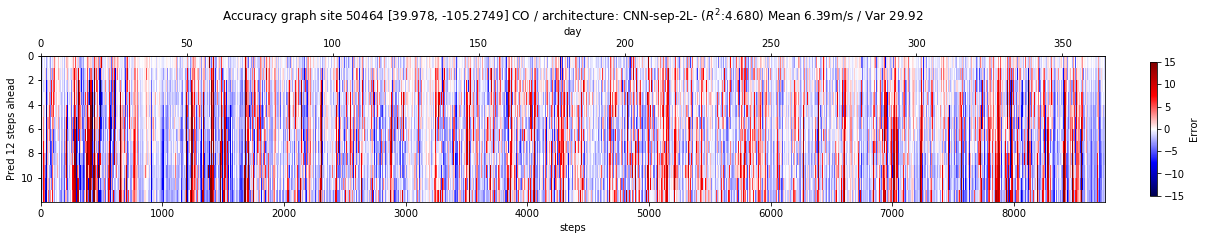

0-152-12 MLP 0-152-12
--- MLP
Accuracy_site 8.972110811
file name 152_accuracy_MLP.pdf


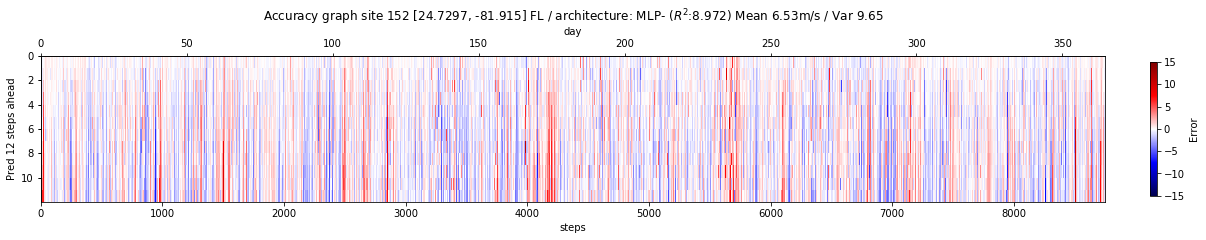

0-232-12 MLP 0-232-12
--- MLP
Accuracy_site 8.953613675
file name 232_accuracy_MLP.pdf


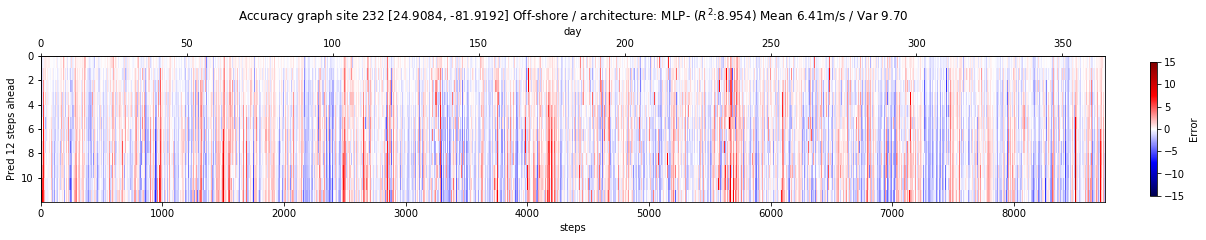

3-1534-12 MLP 3-1534-12
--- MLP
Accuracy_site 9.018639716000001
file name 1534_accuracy_MLP.pdf


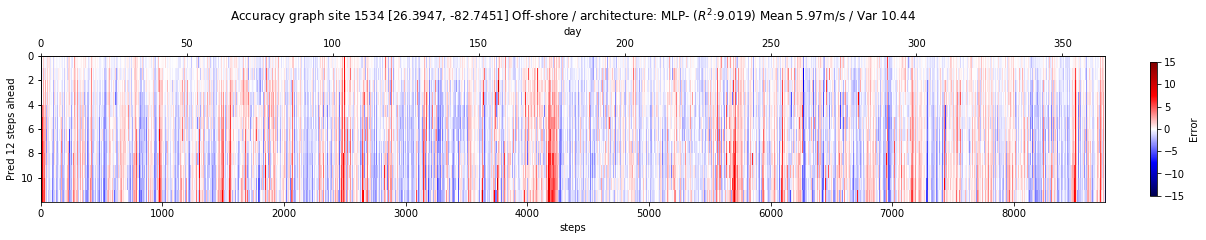

17-8802-12 MLP 17-8802-12
--- MLP
Accuracy_site 4.5786719069999995
file name 8802_accuracy_MLP.pdf


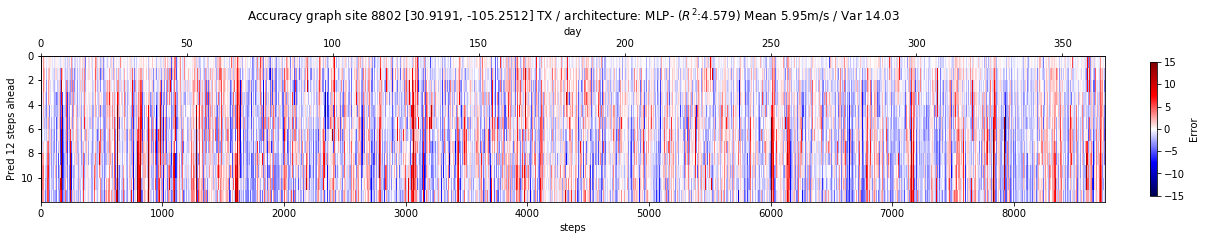

24-12499-12 MLP 24-12499-12
--- MLP
Accuracy_site 4.639994061
file name 12499_accuracy_MLP.pdf


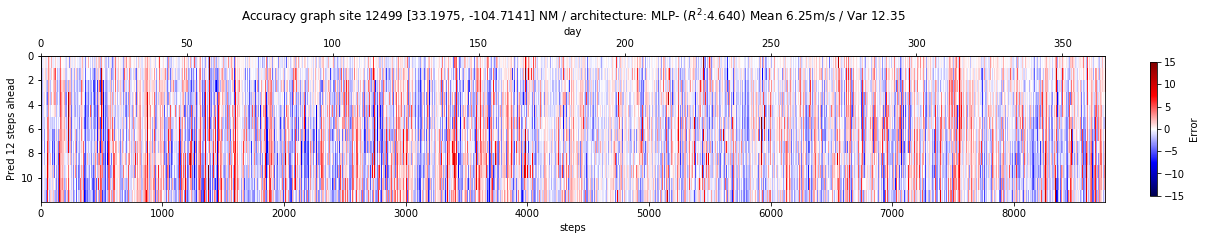

47-23770-12 MLP 47-23770-12
--- MLP
Accuracy_site 8.946579921
file name 23770_accuracy_MLP.pdf


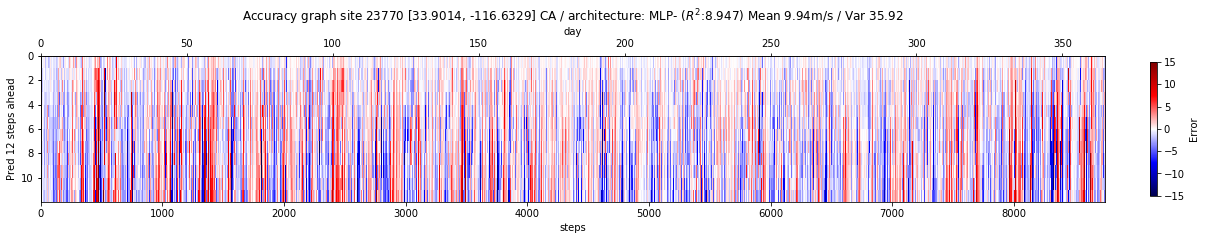

54-27274-12 MLP 54-27274-12
--- MLP
Accuracy_site 4.987202485
file name 27274_accuracy_MLP.pdf


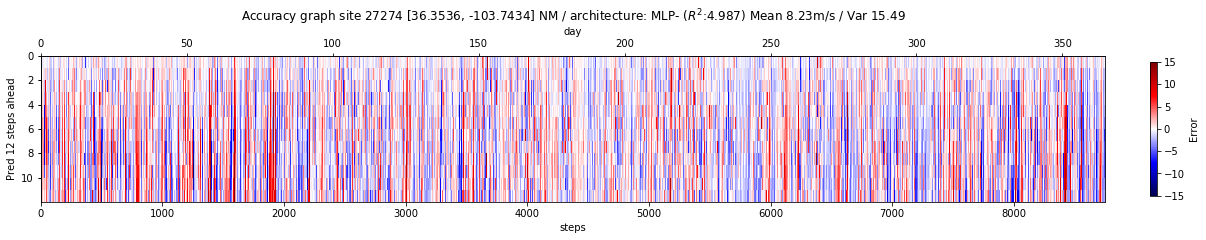

83-41965-12 MLP 83-41965-12
--- MLP
Accuracy_site 4.394794266
file name 41965_accuracy_MLP.pdf


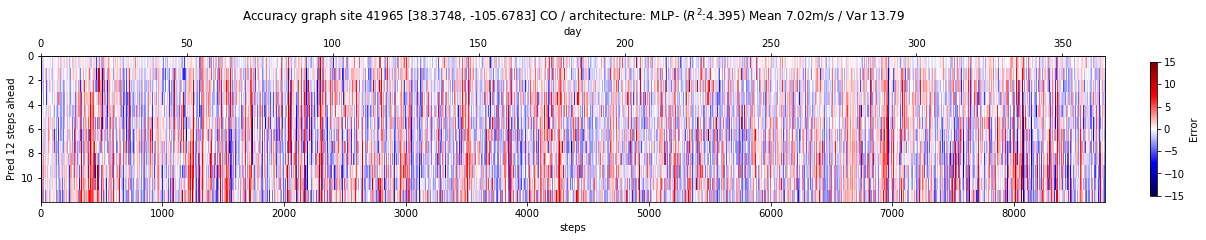

83-41969-12 MLP 83-41969-12
--- MLP
Accuracy_site 4.811147419
file name 41969_accuracy_MLP.pdf


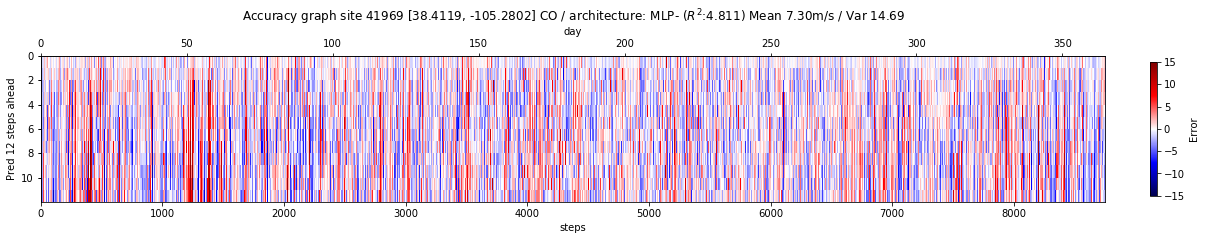

91-45639-12 MLP 91-45639-12
--- MLP
Accuracy_site 4.334507108
file name 45639_accuracy_MLP.pdf


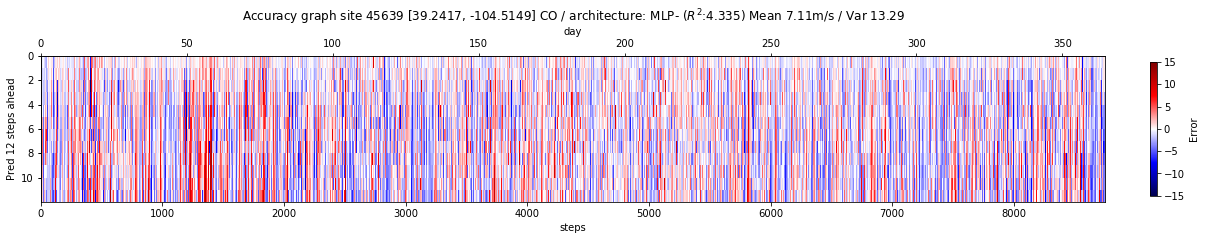

92-46243-12 MLP 92-46243-12
--- MLP
Accuracy_site 3.935184364
file name 46243_accuracy_MLP.pdf


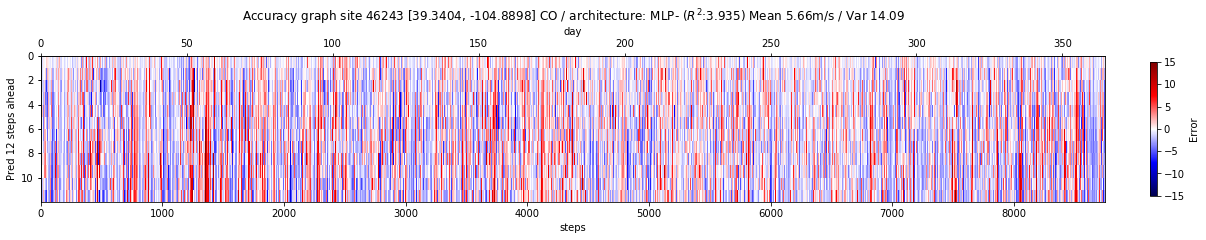

99-49802-12 MLP 99-49802-12
--- MLP
Accuracy_site 4.21046119
file name 49802_accuracy_MLP.pdf


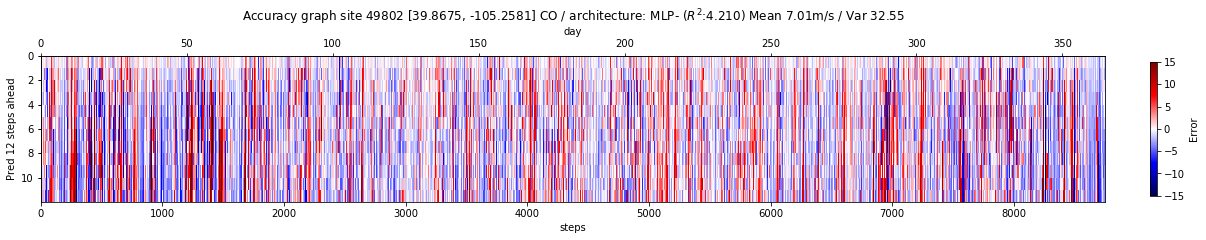

109-54711-12 MLP 109-54711-12
--- MLP
Accuracy_site 4.179387147
file name 54711_accuracy_MLP.pdf


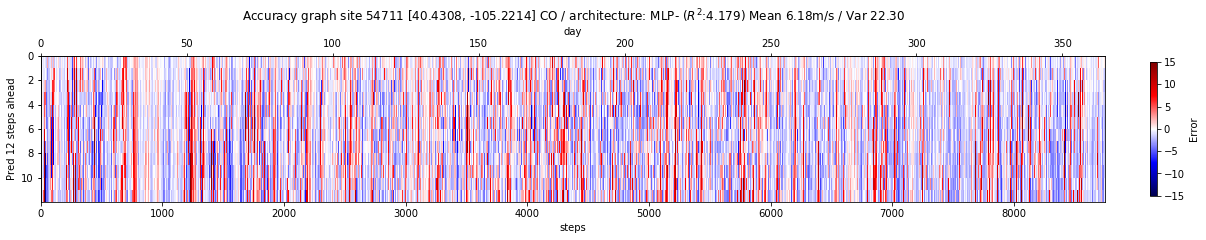

188-94408-12 MLP 188-94408-12
--- MLP
Accuracy_site 8.987178464
file name 94408_accuracy_MLP.pdf


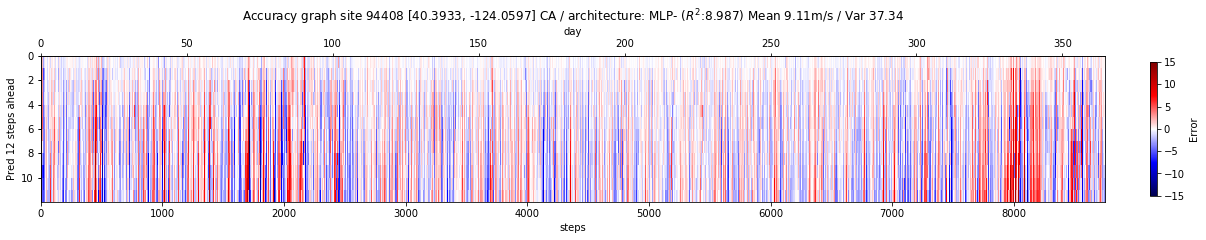

189-94723-12 MLP 189-94723-12
--- MLP
Accuracy_site 4.769502038
file name 94723_accuracy_MLP.pdf


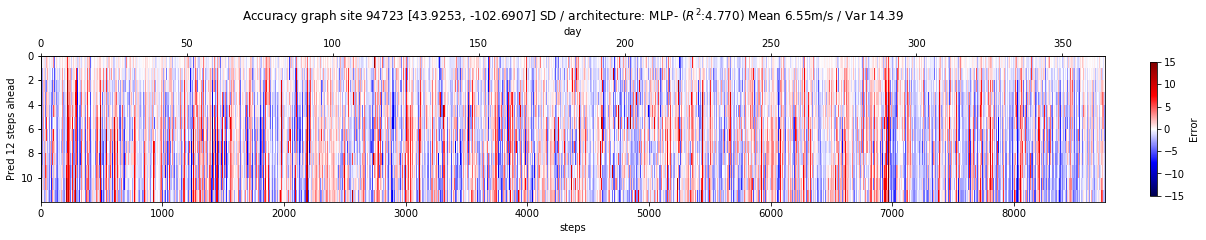

189-94988-12 MLP 189-94988-12
--- MLP
Accuracy_site 4.69248388
file name 94988_accuracy_MLP.pdf


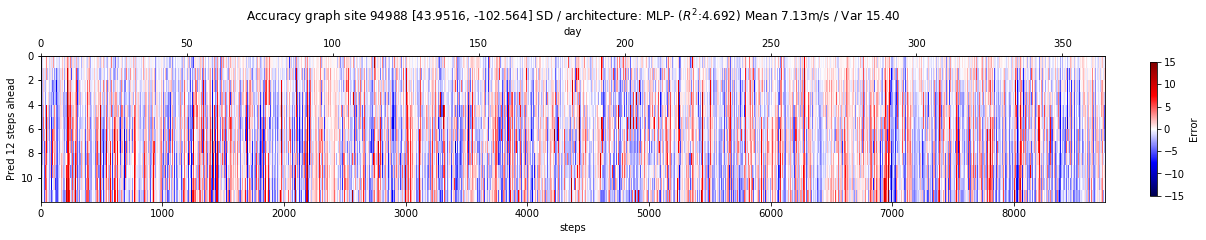

190-95488-12 MLP 190-95488-12
--- MLP
Accuracy_site 9.707196832000001
file name 95488_accuracy_MLP.pdf


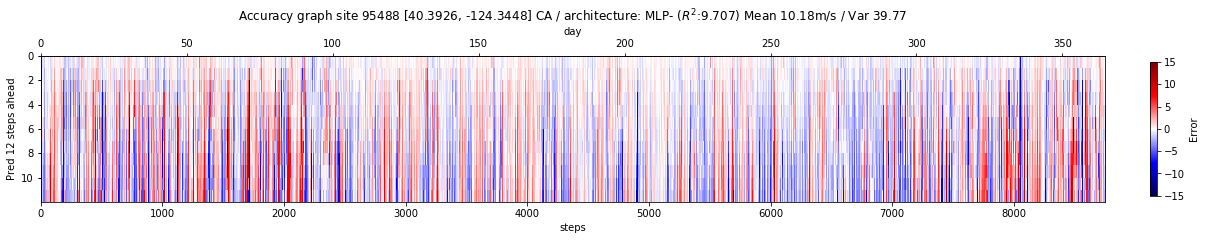

230-115478-12 MLP 230-115478-12
--- MLP
Accuracy_site 8.935483308
file name 115478_accuracy_MLP.pdf


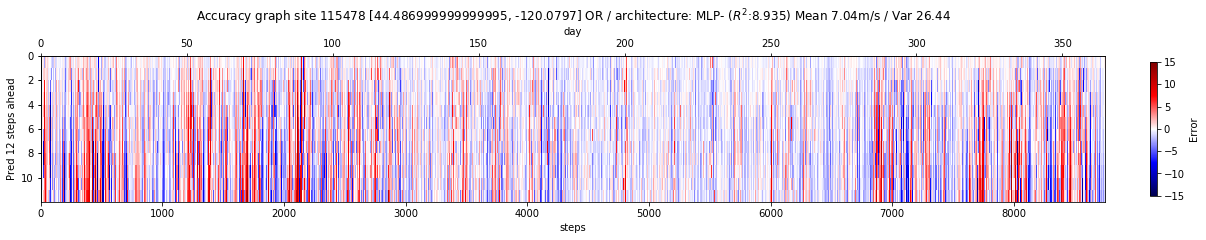

233-116672-12 MLP 233-116672-12
--- MLP
Accuracy_site 8.939537751
file name 116672_accuracy_MLP.pdf


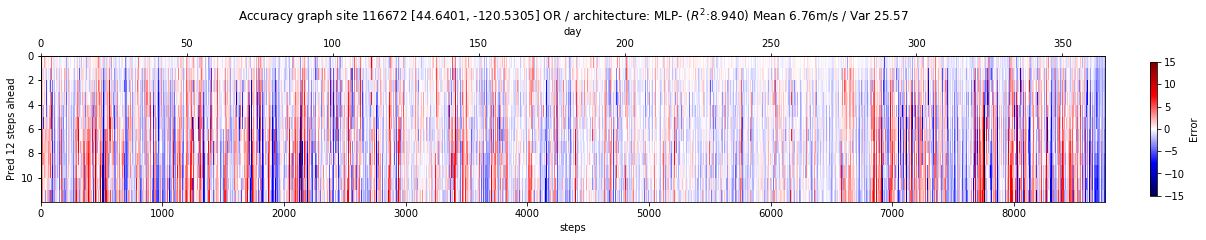

234-117094-12 MLP 234-117094-12
--- MLP
Accuracy_site 9.023150213
file name 117094_accuracy_MLP.pdf


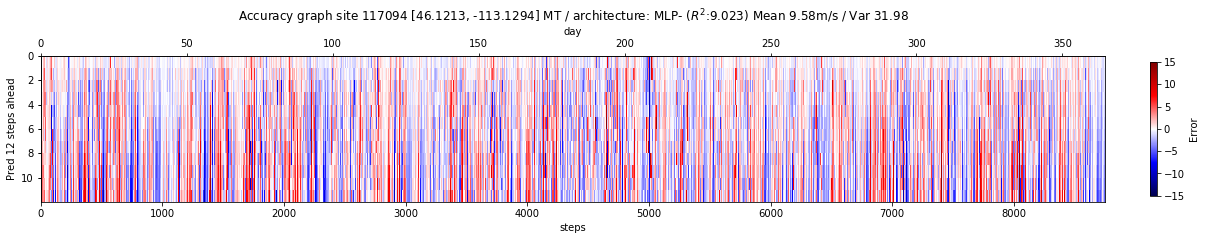

In [43]:
turbines = ['31321','101620', '109115', '23633', '56348', '1434' ,'101242','51361' , '36471','50464',
            '152'  , '232'  ,'1534'   ,'8802'  ,'12499' , '23770', '27274', '41965', '41969', '45639', 
            '46243', '49802', '54711', '94408', '94723', '94988', '95488',  '115478', '116672', '117094']
                


arch = ['CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L', 
        'CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L',  
        'MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP',
       'MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP' ]

mode = ['CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S',
        'MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S',
         'MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S']

zip_files = zip (turbines,arch, mode)

for s, a, m in zip_files: 
    
    plot_accuracy(s,a,m, save=True)

62-31321-12 CNN-sep-2L 62-31321-12
--- CNN-sep-2L
Accuracy_site 9.614645676


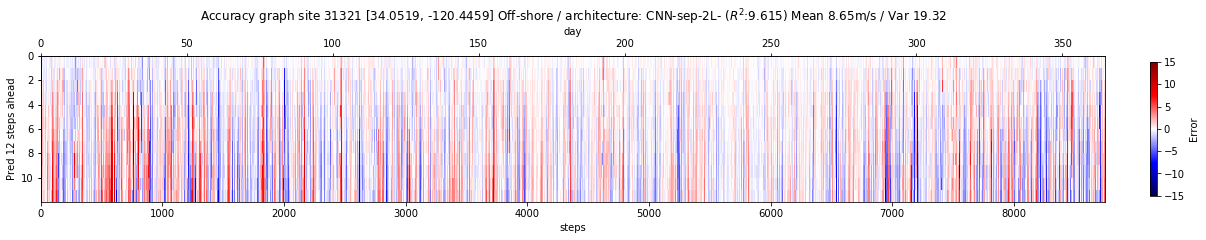

In [44]:
plot_accuracy('31321','CNN-sep-2L', 'CNNS2S', save=False)

62-31321-12 CNN-sep-2L 62-31321-12
--- CNN-sep-2L
Accuracy_site 9.614645676
file name 31321_accuracy_CNN-sep-2L.pdf


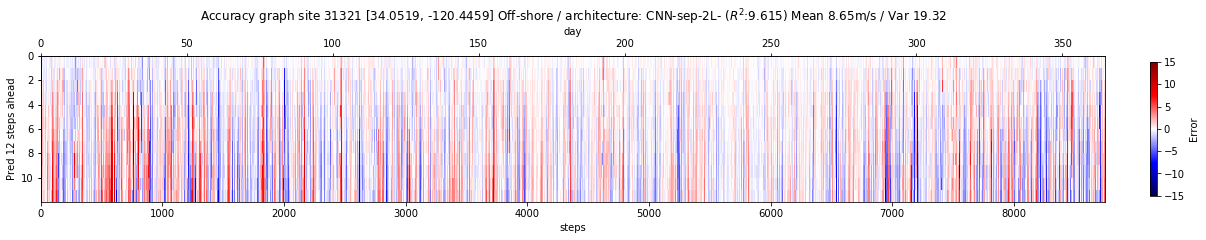

In [45]:
plot_accuracy('31321','CNN-sep-2L', 'CNNS2S', save=True)

11-5794-12 RF_MIMO 11-5794-12
,,,
--- RF_MIMO
Accuracy_site 7.089778067999999


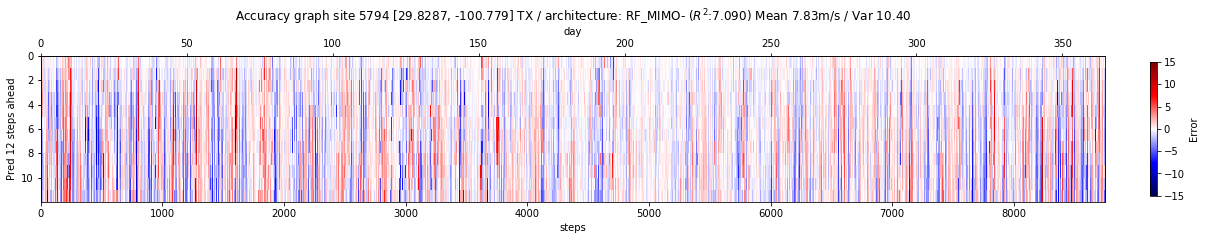

In [46]:
plot_accuracy('5794','RF_MIMO', 'RFS2S', save=False)

11-5794-12 CNN-sep-2L 11-5794-12
--- CNN-sep-2L
Accuracy_site 7.781582305


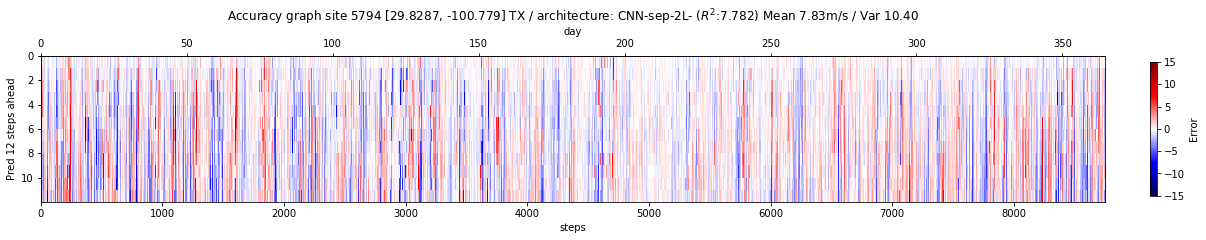

In [47]:
plot_accuracy('5794','CNN-sep-2L', 'CNNS2S', save=False)

46-23019-12 CNN-sep-2L 46-23019-12
--- CNN-sep-2L
Accuracy_site 8.861534567


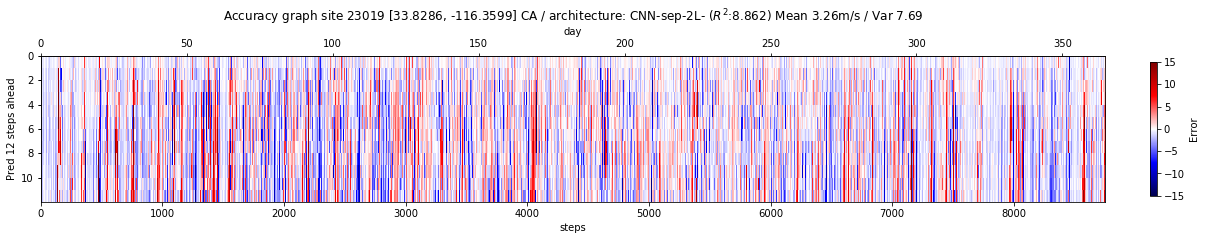

In [48]:
plot_accuracy('23019','CNN-sep-2L', 'CNNS2S', save=False)

46-23019-12 RF_MIMO 46-23019-12
,,,
--- RF_MIMO
Accuracy_site 8.460191056000001


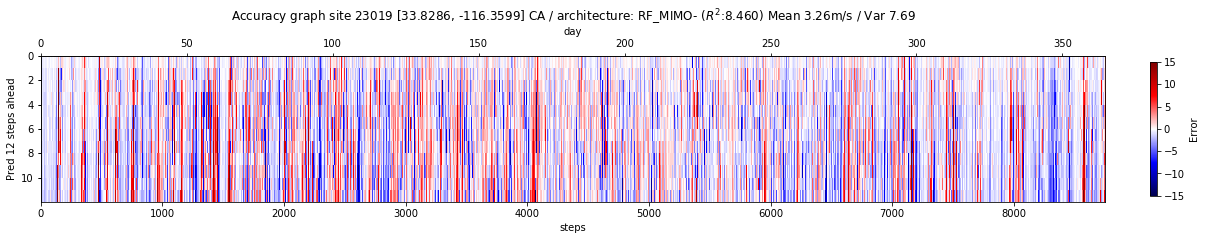

In [49]:
plot_accuracy('23019','RF_MIMO', 'RFS2S', save=False)

237-118728-12 CNN-sep-2L 237-118728-12
--- CNN-sep-2L
Accuracy_site 7.268650365


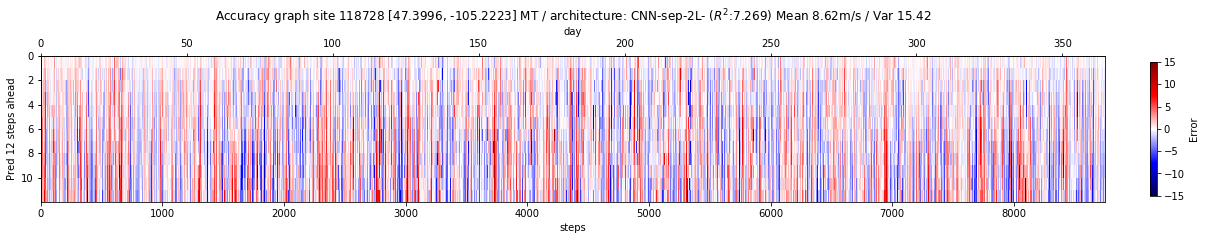

In [50]:
plot_accuracy('118728','CNN-sep-2L', 'CNNS2S', save=False)

237-118728-12 RF_MIMO 237-118728-12
,,,
--- RF_MIMO
Accuracy_site 6.265282591


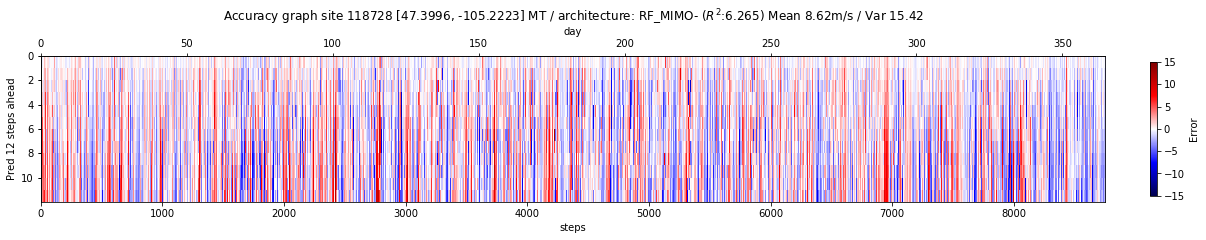

In [51]:
plot_accuracy('118728','RF_MIMO', 'RFS2S', save=False)

92-46325-12 RF_MIMO 92-46325-12
,,,
--- RF_MIMO
Accuracy_site 3.8645583039999996
file name 46325_accuracy_RF_MIMO.pdf


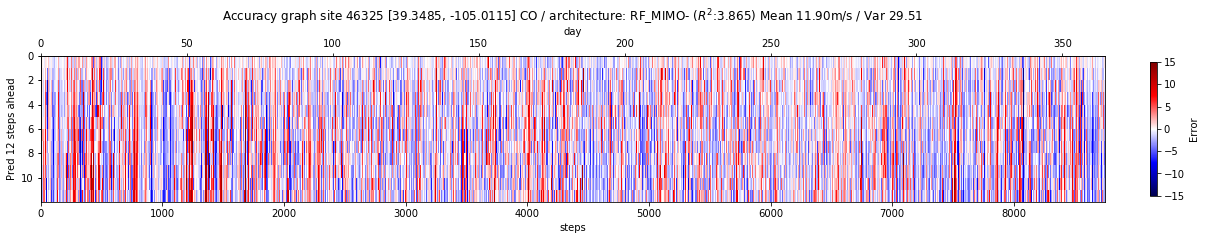

In [52]:
plot_accuracy('46325','RF_MIMO', 'RFS2S', save=True)

92-46325-12 CNN-sep-2L 92-46325-12
--- CNN-sep-2L
Accuracy_site 4.206256334


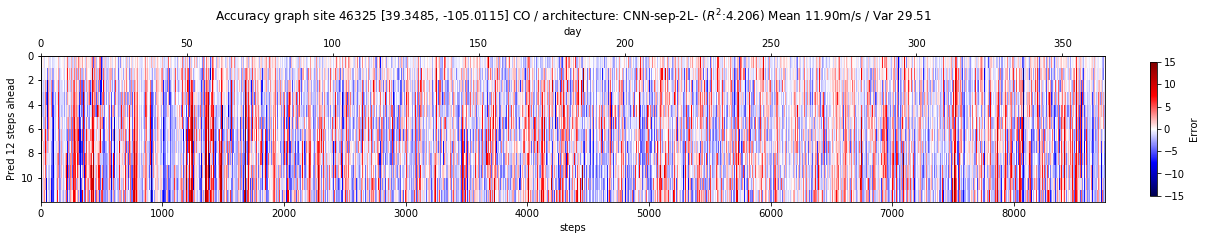

In [53]:
plot_accuracy('46325','CNN-sep-2L', 'CNNS2S', save=False)

92-46325-12 MLP 92-46325-12
--- MLP
Accuracy_site 3.99608379


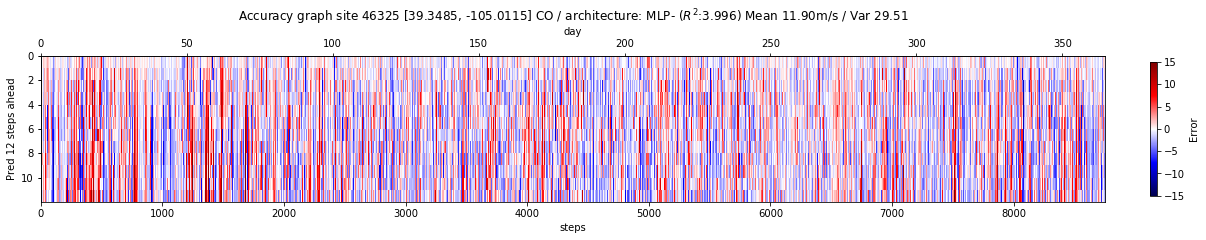

In [54]:
plot_accuracy('46325','MLP', 'MLPS2S', save=False)

92-46325-12 Persistence 92-46325-12
--- Persistence
Accuracy_site -2.472025363


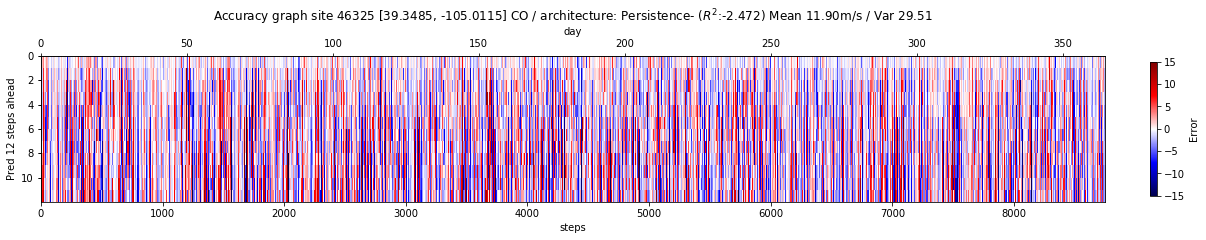

In [55]:
plot_accuracy('46325','Persistence', 'Persistence', save=False)

62-31321-12 Persistence 62-31321-12
--- Persistence
Accuracy_site 7.5465775520000005


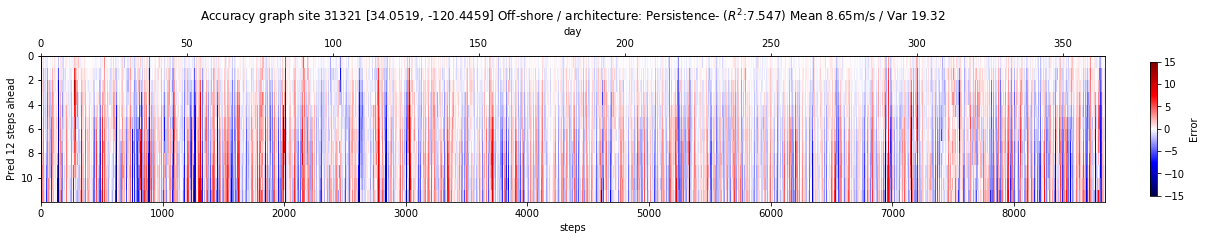

In [56]:
plot_accuracy('31321','Persistence', 'Persistence', save=False)

62-31321-12 CNN-sep-2L 62-31321-12
--- CNN-sep-2L
Accuracy_site 9.614645676
file name 31321_accuracy_CNN-sep-2L.pdf


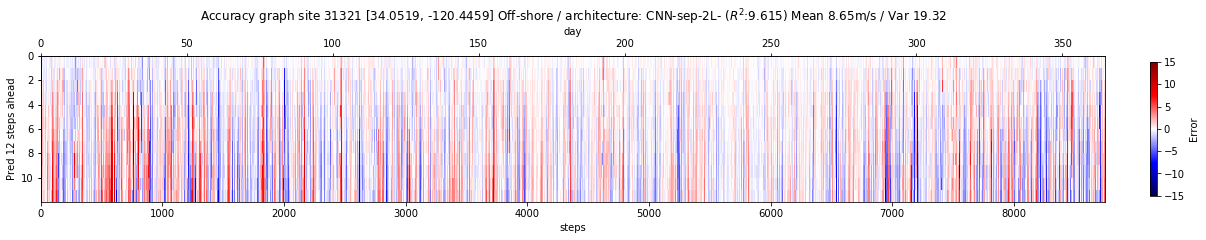

In [57]:
plot_accuracy('31321','CNN-sep-2L', 'CNNS2S', save=True)

75-37917-12 CNN-sep-2L 75-37917-12
--- CNN-sep-2L
Accuracy_site 7.267503317
file name 37917_accuracy_CNN-sep-2L.pdf


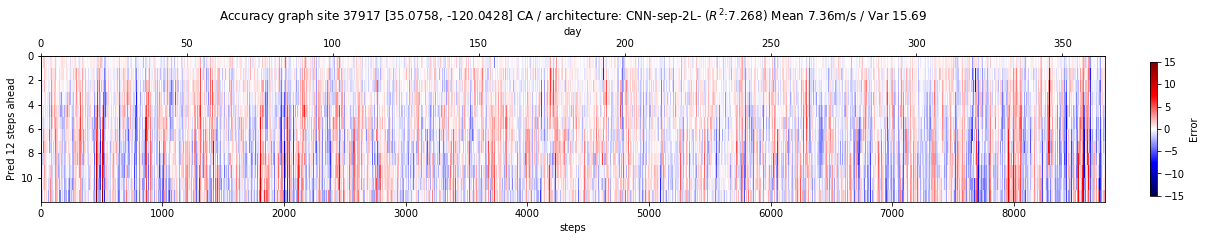

In [58]:
plot_accuracy('37917','CNN-sep-2L', 'CNNS2Ssep', save=True)

75-37917-12 CNN-2L 75-37917-12
--- CNN-2L
Accuracy_site 6.363728575
file name 37917_accuracy_CNN-2L.pdf


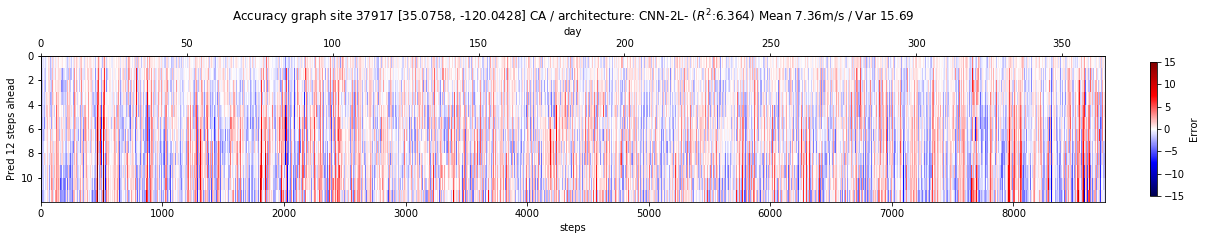

In [59]:
plot_accuracy('37917','CNN-2L', 'CNNS2S', save=True)

75-37917-12 Persistence 75-37917-12
--- Persistence
Accuracy_site -2.634963327
file name 37917_accuracy_Persistence.pdf


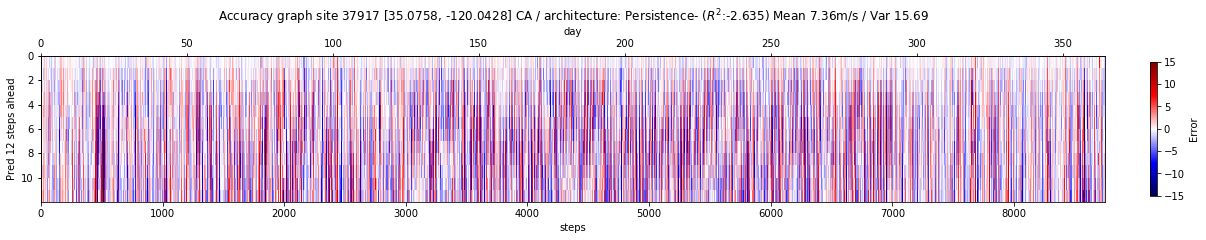

In [60]:
plot_accuracy('37917','Persistence', 'Persistence', save=True)

75-37917-12 RF_MIMO 75-37917-12
(8755, 12)
nvals 8755
,,,
--- RF_MIMO
Accuracy_site 6.843738784
file name 37917_accuracy_RF_MIMO.pdf


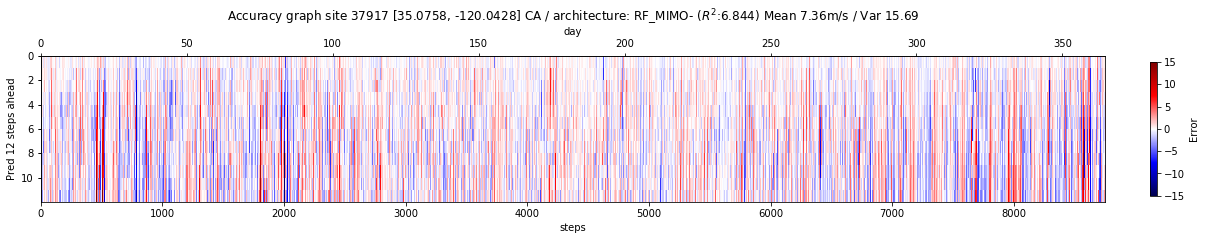

In [21]:
plot_accuracy('37917','RF_MIMO', 'RFS2S', save=True)

62-31321-12 KNNS2S 62-31321-12
(8759, 12)
nvals 8759
--- KNNS2S
Accuracy_site 0
file name 31321_accuracy_KNNS2S.pdf


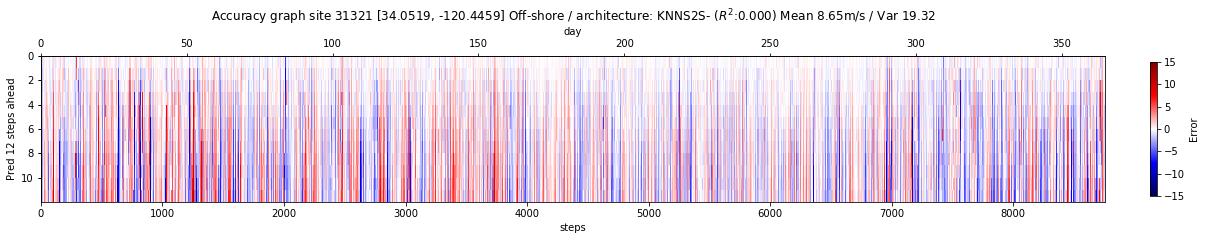

In [7]:
plot_accuracy('31321','KNNS2S', 'KNNS2S', period='12',save=True)

245-122511-12 MLP 245-122511-12
(8755, 12)
nvals 8755
--- MLP
Accuracy_site 9.078138277999999
file name 122511_accuracy_MLP.pdf


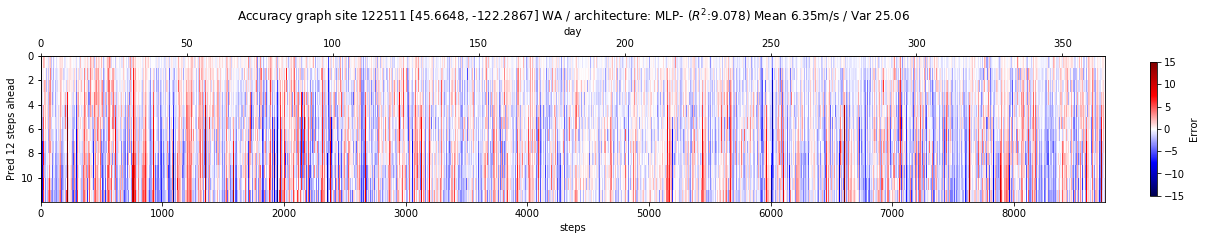

In [6]:
plot_accuracy('122511','MLP', 'MLPS2S', period='12', acc= ,save=True)

62-31321-12 $k$-NN 62-31321-12
(8759, 12)
nvals 8759
acc 8.648
--- $k$-NN
Accuracy_site 8.648
file name 31321_accuracy_$k$-NN.pdf


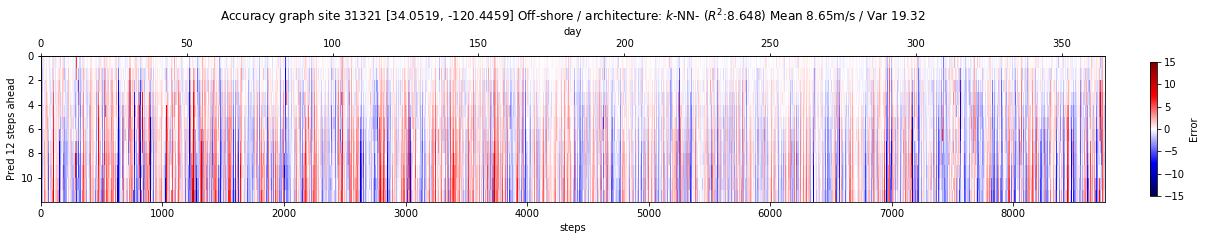

In [26]:
plot_accuracy('31321','$k$-NN', 'KNNS2S', period='12', acc=8.648,save = True)

62-31321-12 CNN-1L 62-31321-12
(8758, 12)
nvals 8758
acc 9.512
--- CNN-1L
Accuracy_site 9.512
file name 31321_accuracy_CNN-1L.pdf


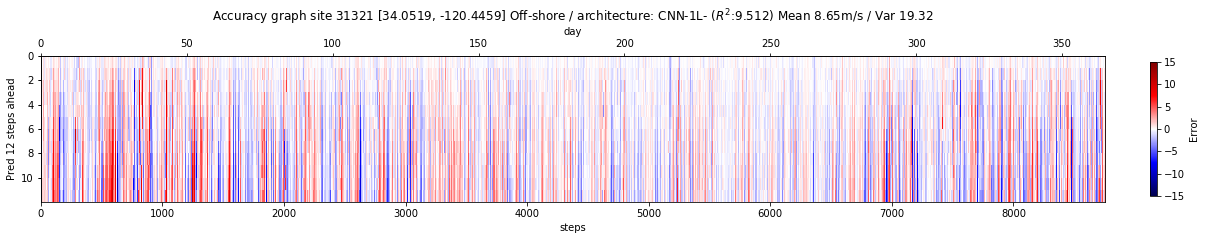

In [27]:
plot_accuracy('31321','CNN-1L', 'CNNS2S', period='12', acc=9.512,save = True)

62-31321-12 CNN-2L sep 62-31321-12
(8755, 12)
nvals 8755
acc 9.638
--- CNN-2L sep
Accuracy_site 9.638
file name 31321_accuracy_CNN-2L sep.pdf


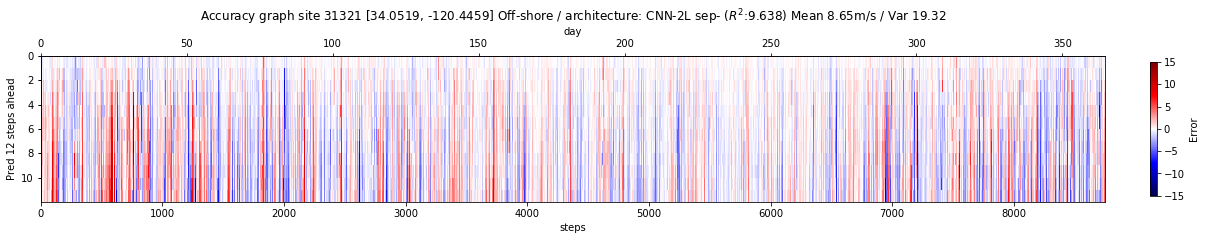

In [28]:
plot_accuracy('31321','CNN-2L sep', 'CNNS2Ssep', period='12', acc=9.638,save = True)

62-31321-12 Random Forest 62-31321-12
(8755, 12)
nvals 8755
acc 9.38
--- Random Forest
Accuracy_site 9.38
file name 31321_accuracy_Random Forest.pdf


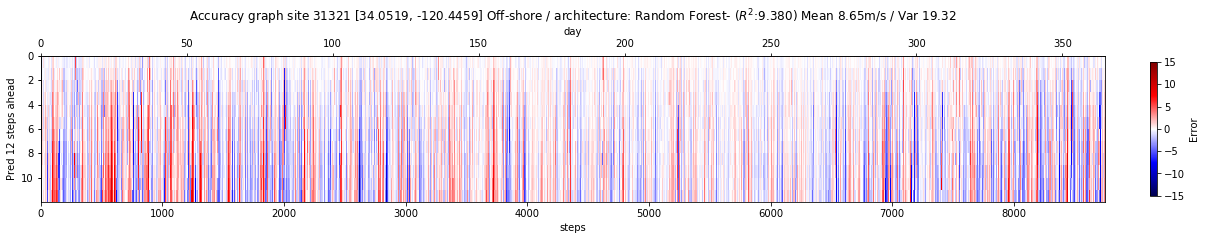

In [29]:
plot_accuracy('31321','Random Forest', 'RFS2S', period='12', acc=9.38, save = True)

62-31321-12 Persistence 62-31321-12
(8752, 12)
nvals 8752
acc 7.987
--- Persistence
Accuracy_site 7.987
file name 31321_accuracy_Persistence.pdf


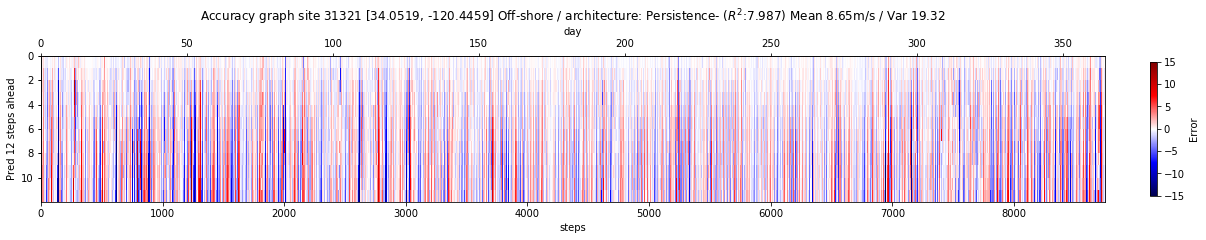

In [30]:
plot_accuracy('31321','Persistence', 'Persistence', period='12', acc=7.987, save = True)

237-118728-12 Persistence 237-118728-12
(8752, 12)
nvals 8752
acc 2.52
--- Persistence
Accuracy_site 2.52
file name 118728_accuracy_Persistence.pdf


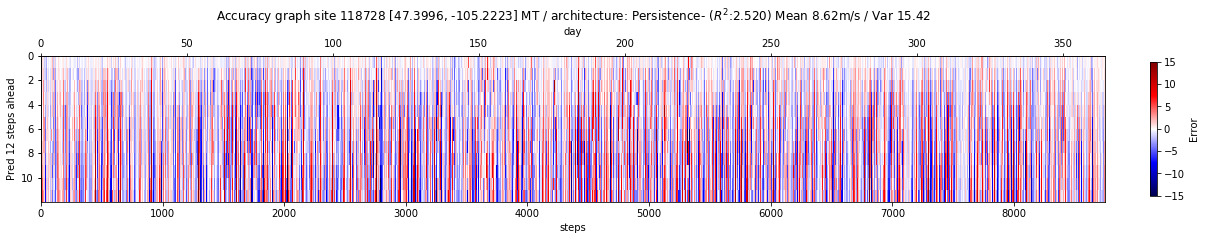

In [32]:
plot_accuracy('118728','Persistence', 'Persistence', period='12', acc=2.52, save = True)

237-118728-12 Random_Forest 237-118728-12
(8755, 12)
nvals 8755
acc 6.282
--- Random_Forest
Accuracy_site 6.282
file name 118728_accuracy_Random_Forest.pdf


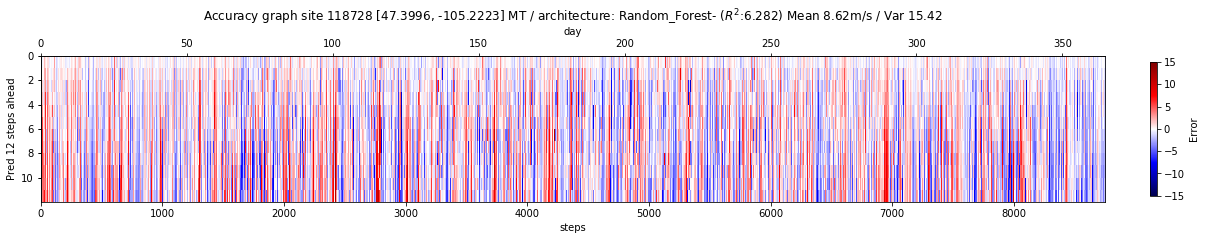

In [39]:
plot_accuracy('118728','Random_Forest', 'RFS2S', period='12', acc=6.282, save = True)

237-118728-12 CNN-2L sep 237-118728-12
(8755, 12)
nvals 8755
acc 7.13
--- CNN-2L sep
Accuracy_site 7.13
file name 118728_accuracy_CNN-2L sep.pdf


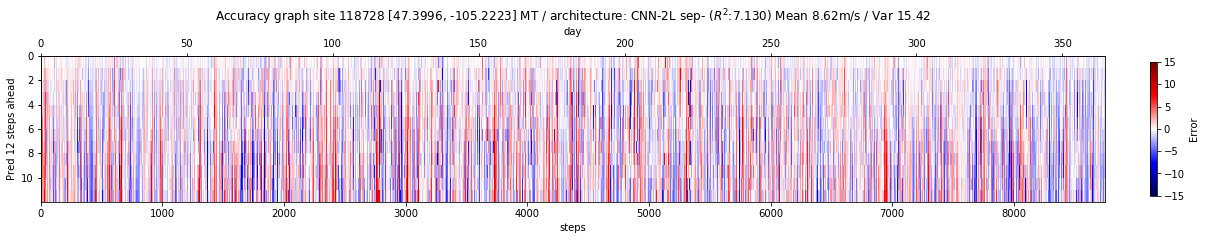

In [34]:
plot_accuracy('118728','CNN-2L sep', 'CNNS2Ssep', period='12', acc=7.13,save = True)

237-118728-12 CNN-1L 237-118728-12
(8758, 12)
nvals 8758
acc 7.055
--- CNN-1L
Accuracy_site 7.055
file name 118728_accuracy_CNN-1L.pdf


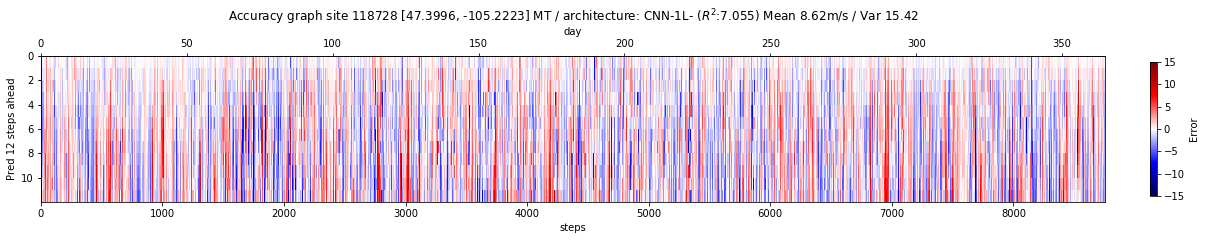

In [35]:
plot_accuracy('118728','CNN-1L', 'CNNS2S', period='12', acc=7.055,save = True)

237-118728-12 $k$-NN 237-118728-12
(8759, 12)
nvals 8759
acc 5.208
--- $k$-NN
Accuracy_site 5.208
file name 118728_accuracy_$k$-NN.pdf


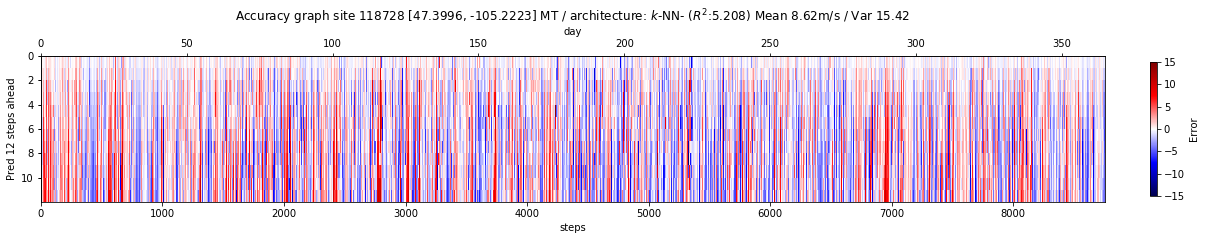

In [38]:
plot_accuracy('118728','$k$-NN', 'KNNS2S', period='12', acc=5.208,save = True)

75-37917-12 $k$-NN 75-37917-12
(8759, 12)
nvals 8759
acc 5.208
--- $k$-NN
Accuracy_site 5.208
file name 37917_accuracy_$k$-NN.pdf


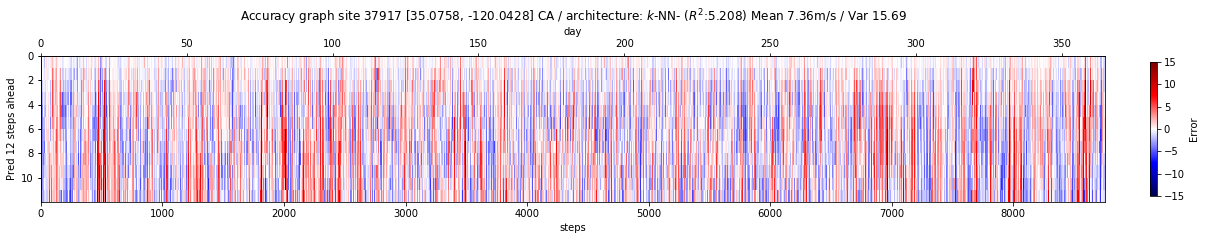

In [40]:
plot_accuracy('37917','$k$-NN', 'KNNS2S', period='12', acc=5.208,save = True)